In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
# データ読み込み
dataset = pd.read_csv("kaggle_housing_price.csv")
type(dataset)

pandas.core.frame.DataFrame

In [4]:
# データを最初の5行だけ表示
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# データの行数、列数を表示
dataset.shape

(1460, 81)

In [6]:
# 要約統計量を表示
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# インデックス番号0~10の行を抽出
dataset[:11]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
# "SalePrice"と"LotArea"の列を抽出し、最初の10行だけ表示
dataset.loc[:,["SalePrice","LotArea"]].head(10)

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


In [9]:
# "1stFlrSF"と"2ndFlrSF"を合計した"FlrSF_total"を新たな列として加える
dataset['FlrSF_total']=dataset['1stFlrSF']+dataset['2ndFlrSF']
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FlrSF_total
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198


In [10]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書き。
dataset=pd.get_dummies(dataset,columns=['SaleType'])

In [11]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1262,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1717,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1


In [12]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
dataset.query('YearBuilt >= 2000').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


In [13]:
# 'YearBuilt'が2000以降、'GarageCars'が2以上の物件を抽出
dataset.query('YearBuilt >= 2000 and GarageCars >= 2').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f892ef0>]],
      dtype=object)

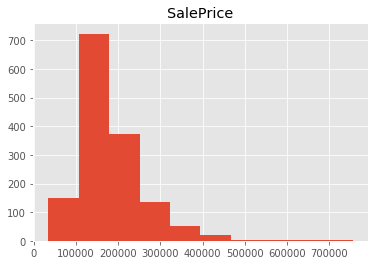

In [14]:
# datasetの'SalePrice'をヒストグラムで表示
dataset.hist('SalePrice')

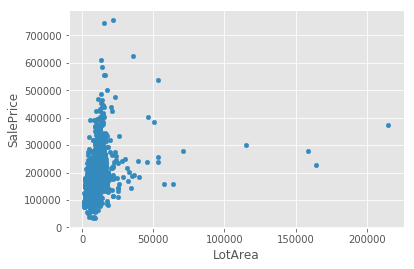

In [15]:
# datasetの'LotArea'と'SalePrice'を散布図で表示
dataset.plot('LotArea','SalePrice','scatter')

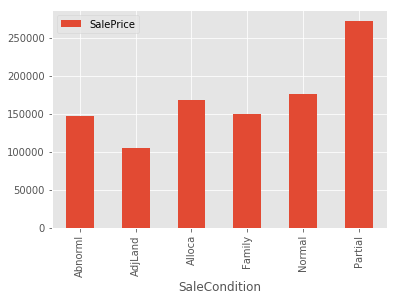

In [16]:
#'SalePrice'のSaleCondition毎の平均を変数　price_by_conditionに格納
price_by_condition=dataset.groupby('SaleCondition')['SalePrice'].mean().reset_index()
# price_by_conditionが持つ、棒グラフを表示する命令を実行
price_by_condition.plot.bar(x="SaleCondition")

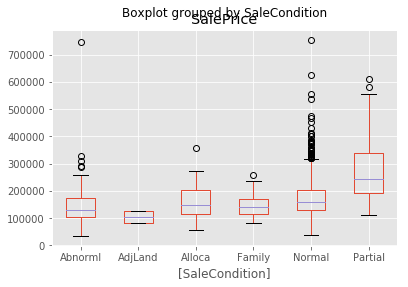

In [17]:
# datasetの'SaleCondition'ごとに'SalePrice'をboxplotで表示
df=dataset.loc[:,["SalePrice","SaleCondition"]]
df.boxplot(by='SaleCondition')

In [18]:
# 列ごとに欠損値の有無を確認
for i in dataset.columns:
    print(i,pd.isnull(dataset[i]).sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol